# Customer Segmentation using RFM Analysis and K-Means Clustering

## Project Overview
This project aims to segment customers of an online retail store based on their purchasing behavior. By applying RFM (Recency, Frequency, Monetary) analysis and K-Means Clustering, we identify distinct customer groups to help the business implement targeted marketing strategies and improve customer retention.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Data Source
The dataset used in this project is the "Online Retail" dataset, a publicly available dataset containing all transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based, registered non-store online retail.

Origin: UCI Machine Learning Repository (or Kaggle)

Attributes: 8 features (InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country)

In [2]:
df = pd.read_excel('Online Retail.xlsx')

## Exploratory Data Analysis

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.shape

(541909, 8)

In [5]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
df[df['CustomerID'].isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [9]:
df.query('Quantity <= 0')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [10]:
df.query('UnitPrice <= 0')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,2011-12-08 13:58:00,0.0,NaN,United Kingdom
538505,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,2011-12-08 13:58:00,0.0,NaN,United Kingdom
538554,581408,85175,NaN,20,2011-12-08 14:06:00,0.0,NaN,United Kingdom


In [11]:
df.loc[df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


## Data Preprocessing & Cleaning
To ensure data integrity, a rigorous cleaning process was applied using Pandas:

Handling Duplicates: Removed identical rows to prevent overcounting transactions.

Filtering Noise: Excluded transactions with non-positive Quantity and UnitPrice to remove cancellations, returns, and accounting adjustments.

Missing Values: Dropped records without a CustomerID as they cannot be assigned to a specific customer profile.

In [12]:
df_cleaned = df.drop_duplicates().query('Quantity > 0 & UnitPrice > 0').dropna(subset='CustomerID')

In [13]:
df_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [14]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  float64       
 7   Country      392692 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.0+ MB


## Feature Engineering

Before aggregating data at the customer level, we must determine the total value of each transaction line. This is a crucial step for calculating the Monetary ($M$) value in our RFM model.Process: We created a new feature, TotalPrice, by calculating the product of the quantity and the unit price for each record:$$\text{TotalPrice} = \text{Quantity} \times \text{UnitPrice}$$

In [41]:
df_cleaned_totalprice = df_cleaned.copy()

df_cleaned_totalprice['TotalPrice'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']
df_cleaned_totalprice.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


### RFM Analysis
We transformed transactional data into three behavioral features:

Recency (R): Days since the last purchase (lower is better).

Frequency (F): Number of unique transactions (nunique) per customer to measure true loyalty rather than total items bought.

Monetary (M): Total revenue generated by the customer.

In [16]:
import datetime as dt

current_date = df_cleaned_totalprice['InvoiceDate'].max() + dt.timedelta(days=1)

df_rfm = df_cleaned_totalprice.groupby(by='CustomerID') \
    .agg({
    'InvoiceDate': lambda x: (current_date - x.max()).days,   # Recency
    'InvoiceNo': 'nunique',                                   # Frequency
    'TotalPrice': 'sum'                                       # Monetary
})

df_rfm.columns = ['Recency', 'Frequency', 'Monetary']

In [17]:
df_rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,7,4310.00
12348.0,75,4,1797.24
12349.0,19,1,1757.55
12350.0,310,1,334.40


In [18]:
df_rfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4338 entries, 12346.0 to 18287.0
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    4338 non-null   int64  
 1   Frequency  4338 non-null   int64  
 2   Monetary   4338 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 135.6 KB


In [19]:
df_rfm.describe()

,Recency,Frequency,Monetary
count,4338.000000,4338.000000,4338.000000
mean,92.536422,4.272015,2048.688081
std,100.014169,7.697998,8985.230220
min,1.000000,1.000000,3.750000
25%,18.000000,1.000000,306.482500
50%,51.000000,2.000000,668.570000
75%,142.000000,5.000000,1660.597500
max,374.000000,209.000000,280206.020000


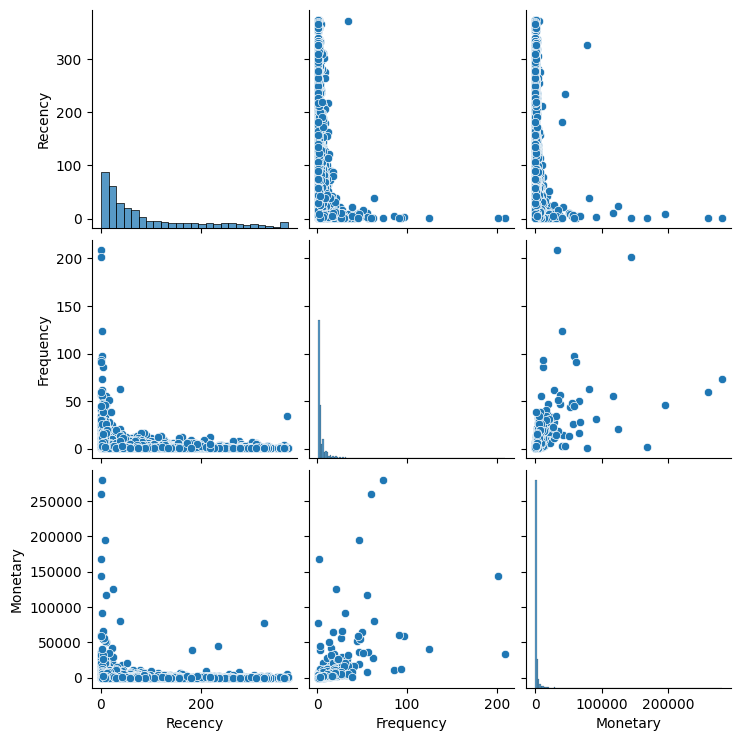

In [20]:
sns.pairplot(data=df_rfm);

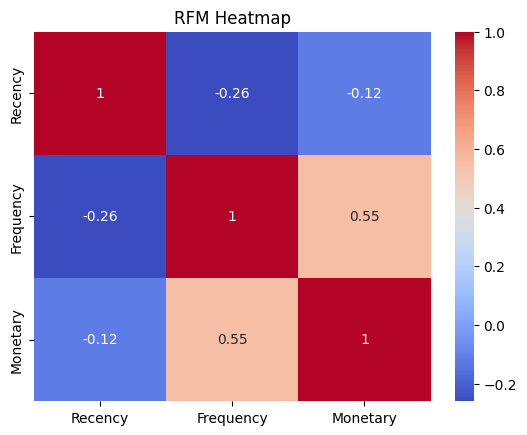

In [21]:
sns.heatmap(df_rfm.corr(), annot=True, cmap='coolwarm')
plt.title('RFM Heatmap')
plt.show()

Before performing segmentation, we analyzed the raw RFM distributions. This step revealed several critical challenges that influenced our preprocessing strategy.

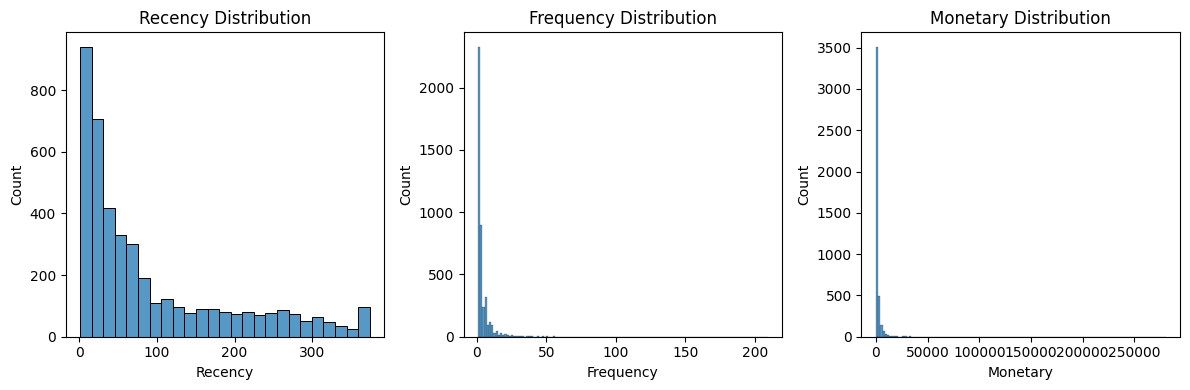

In [22]:
plt.figure(figsize=(12,4))

for i, col in enumerate(df_rfm.columns):
    plt.subplot(1,3,i+1)
    sns.histplot(data=df_rfm, x=col)
    plt.title(f'{col} Distribution')

plt.tight_layout();

The histograms reveal highly right-skewed distributions across all RFM features, where most customers are concentrated at lower values with a long tail on the right. This skewness can lead to biased clustering results, as standard models struggle to differentiate between data points that are too bunched together, necessitating Log Transformation for normalization.

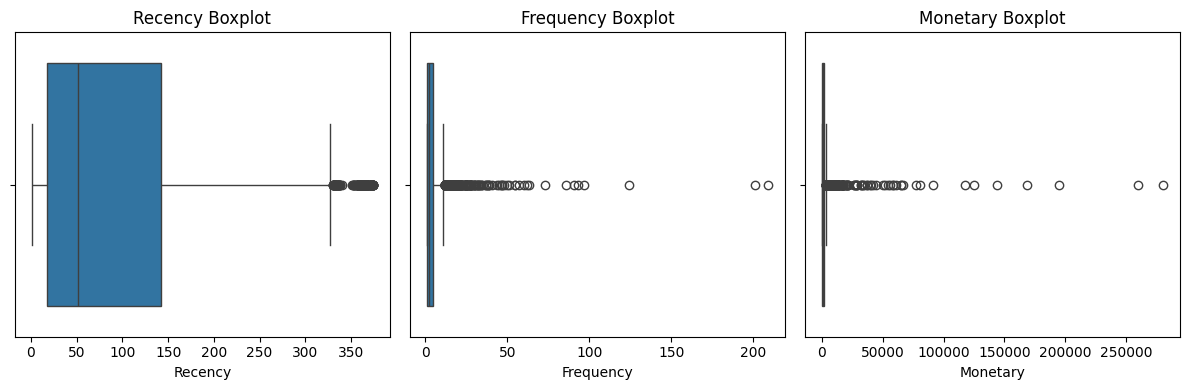

In [23]:
plt.figure(figsize=(12,4))

for i, col in enumerate(df_rfm.columns):
    plt.subplot(1,3,i+1)
    sns.boxplot(data=df_rfm, x=col)
    plt.title(f'{col} Boxplot')

plt.tight_layout();

Initial boxplots identify significant extreme outliers and high variance, especially within the Frequency and Monetary dimensions. These 'gravity wells' would disproportionately distort K-Means distance calculations and pull cluster centroids away from the true groupings, requiring robust data scaling and transformation to ensure stable and accurate segmentation.

Based on these findings, we determined that Log Transformation and Standardization were mandatory steps to normalize the distributions and ensure each feature contributes equally to the clustering process.

## Machine Learning Workflow
## Data Transformation

Customer data is often highly skewed. To prepare the data for K-Means:

Log Transformation: Applied to normalize the distribution and reduce the impact of extreme outliers.

In [42]:
df_rfm_log = np.log1p(df_rfm)
df_rfm_log.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,5.789960,0.693147,11.253955
12347.0,1.098612,2.079442,8.368925
12348.0,4.330733,1.609438,7.494564
12349.0,2.995732,0.693147,7.472245
12350.0,5.739793,0.693147,5.815324


In [25]:
df_rfm_log.describe()

,Recency,Frequency,Monetary
count,4338.000000,4338.000000,4338.000000
mean,3.830734,1.345582,6.588562
std,1.340261,0.683104,1.258438
min,0.693147,0.693147,1.558145
25%,2.944439,0.693147,5.728418
50%,3.951244,1.098612,6.506636
75%,4.962845,1.791759,7.415535
max,5.926926,5.347108,12.543284


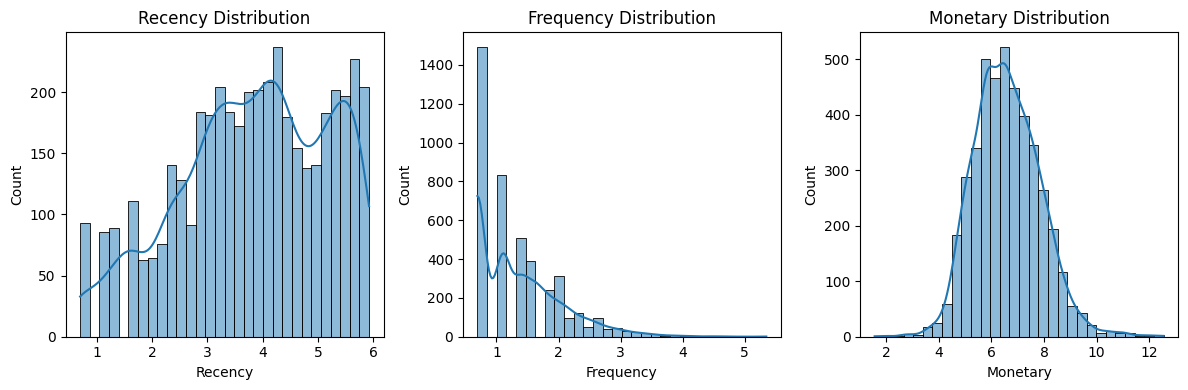

In [26]:
plt.figure(figsize=(12,4))

for i, col in enumerate(df_rfm_log.columns):
    plt.subplot(1,3,i+1)
    sns.histplot(data=df_rfm_log, x=col, kde=True, bins=30)
    plt.title(f'{col} Distribution')

plt.tight_layout();

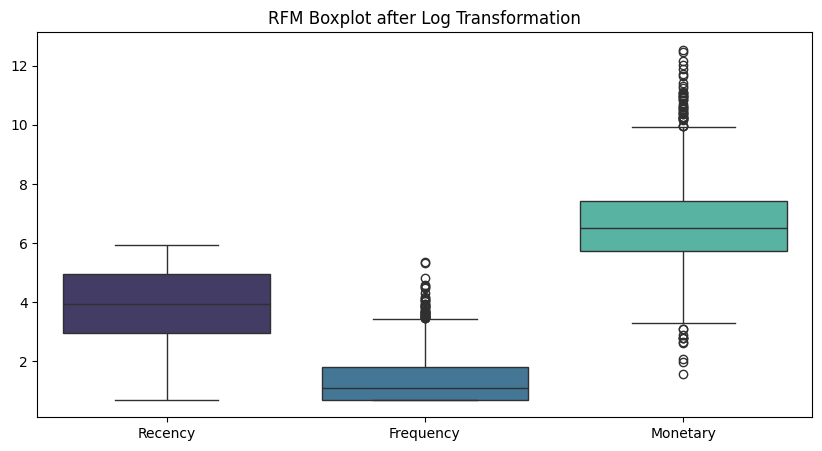

In [27]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_rfm_log, palette='mako')
plt.title("RFM Boxplot after Log Transformation")
plt.show()

Standardization: Used StandardScaler to ensure all features have a mean of 0 and a standard deviation of 1, preventing the model from being biased toward the feature with the largest numerical range.

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

rfm_scaled = scaler.fit_transform(df_rfm_log)
rfm_scaled

array([[ 1.46199281, -0.95521426,  3.7077163 ],
       [-2.03873442,  1.07442519,  1.41490344],
       [ 0.37310424,  0.38630445,  0.72002428],
       ...,
       [-1.21893976, -0.36158278, -1.11333158],
       [-1.65755161,  2.17800394,  0.82281217],
       [-0.03473174,  0.05960547,  0.73752572]], shape=(4338, 3))

In [40]:
df_rfm_scaled = pd.DataFrame(rfm_scaled, index=df_rfm_log.index, columns=df_rfm_log.columns)
df_rfm_scaled.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,1.461993,-0.955214,3.707716
12347.0,-2.038734,1.074425,1.414903
12348.0,0.373104,0.386304,0.720024
12349.0,-0.623086,-0.955214,0.702287
12350.0,1.424558,-0.955214,-0.614514


In [30]:
df_rfm_scaled.describe()

,Recency,Frequency,Monetary
count,4.338000e+03,4.338000e+03,4.338000e+03
mean,-8.025955e-17,-8.189750e-18,-3.669008e-16
std,1.000115e+00,1.000115e+00,1.000115e+00
min,-2.341296e+00,-9.552143e-01,-3.997811e+00
25%,-6.613615e-01,-9.552143e-01,-6.835802e-01
50%,8.992557e-02,-3.615828e-01,-6.510929e-02
75%,8.447915e-01,6.532370e-01,6.572178e-01
max,1.564198e+00,5.858535e+00,4.732381e+00


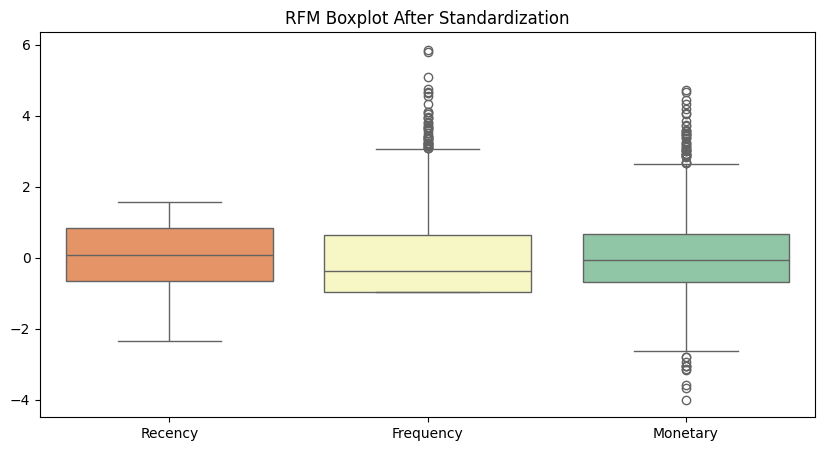

In [31]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_rfm_scaled, palette='Spectral')
plt.title("RFM Boxplot After Standardization")
plt.show()

After applying Log Transformation and StandardScaler, all features are scaled to a uniform range (mean = 0, std = 1). This ensures that no single variable such as Monetary dominates the K-Means distance calculations due to its original unit scale, resulting in a more balanced and stable clustering process.

## Optimal K Selection (Elbow Method)
To determine the most appropriate number of clusters (K), we utilized the Elbow Method. This involves calculating the Within-Cluster Sum of Squares (WCSS) also referred to as Inertia for a range of K values (typically from 1 to 10).

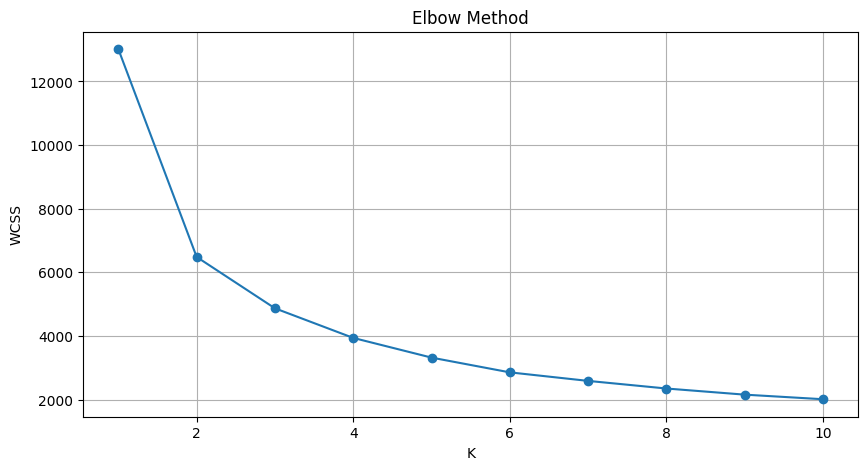

In [32]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_rfm_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('K')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

By plotting the WCSS against the number of clusters, we look for the "Elbow Point"the specific point where the rate of decrease in WCSS shifts from rapid to marginal.

In this project, the "elbow" is clearly visible at K = 3. Beyond this point, the reduction in WCSS becomes significantly slower, suggesting that 3 is the optimal balance between model complexity and segmentation clarity. This allows us to categorize our customers into three meaningful groups (Gold, Silver, Bronze).

In [33]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(df_rfm_scaled)

In [34]:
df_rfm_cluster = df_rfm.copy()

df_rfm_cluster['Cluster_Labels'] = clusters
df_rfm_cluster.head()

,Recency,Frequency,Monetary,Cluster_Labels
CustomerID,,,,
12346.0,326,1,77183.60,2
12347.0,2,7,4310.00,1
12348.0,75,4,1797.24,2
12349.0,19,1,1757.55,2
12350.0,310,1,334.40,0


## Principal Component Analysis (PCA)
Since RFM data is 3-dimensional, we utilized Principal Component Analysis $(PCA)$ to reduce the dimensionality to 2D. This allows us to visualize how clearly the K-Means algorithm has separated the different customer segments in a 2D space.

In [35]:
df_rfm_cluster_pca = df_rfm_cluster.copy()

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_rfm_scaled)
df_rfm_cluster_pca['PCA1'] = pca_data[:,0]
df_rfm_cluster_pca['PCA2'] = pca_data[:,1]

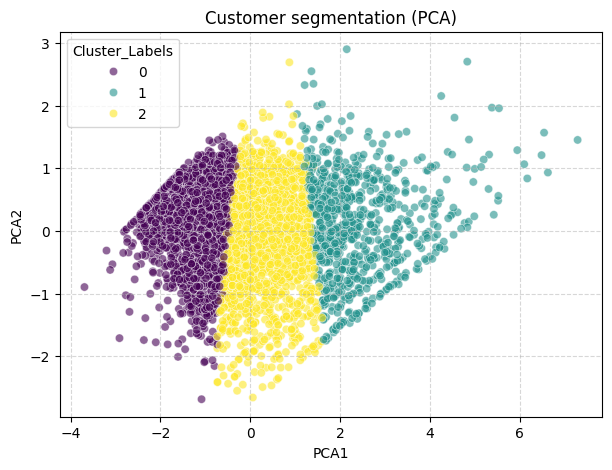

In [36]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df_rfm_cluster_pca, x='PCA1', y='PCA2', hue='Cluster_Labels', palette='viridis', alpha=0.6)
plt.title('Customer segmentation (PCA)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

The plot demonstrates a clear and distinct separation between the three clusters with no significant overlap. This validates the effectiveness of our K-Means model in identifying unique customer behaviors.

## Segment Profiling

Cluster_Labels
0    1869
2    1694
1     775
Name: count, dtype: int64


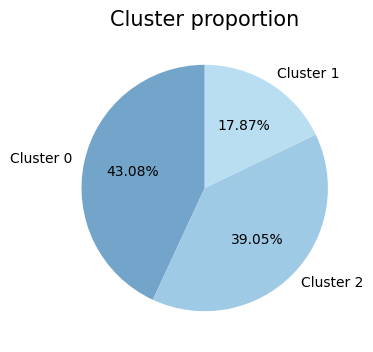

In [37]:
cluster_proportion = df_rfm_cluster.Cluster_Labels.value_counts()
print(cluster_proportion),

labels = { 0 : 'Cluster 0', 2 : 'Cluster 2', 1 : 'Cluster 1' }
colors = ["#73A4CA","#9FCAE6","#B9DDF1"]
plt.figure(figsize=(4,4))
plt.pie(cluster_proportion, labels=labels.values(), autopct='%.2f%%', colors=colors, startangle=90)
plt.title('Cluster proportion', fontsize=15)
plt.show()

In [38]:
cluster_analysis = df_rfm_cluster.groupby('Cluster_Labels')[['Recency','Frequency','Monetary']].mean()
cluster_analysis

,Recency,Frequency,Monetary
Cluster_Labels,,,
0,167.494917,1.350990,360.420268
1,17.067097,13.282581,7859.031768
2,44.361275,3.372491,1253.148638


## Revenue Proportion Analysis

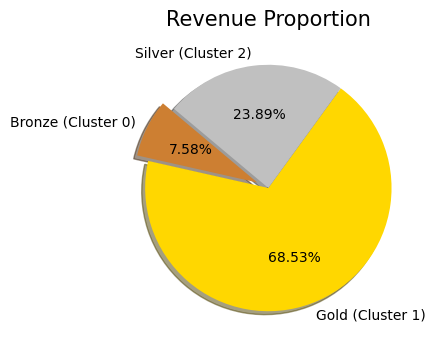

In [39]:
cluster_revenue = df_rfm_cluster.groupby('Cluster_Labels')['Monetary'].sum()

labels = { 0:'Bronze (Cluster 0)', 1: 'Gold (Cluster 1)', 2: 'Silver (Cluster 2)'}

plt.figure(figsize=(4, 4))
colors = ["#CD7F32", "#FFD700","#C0C0C0"]
plt.pie(cluster_revenue, 
        labels=labels.values(), 
        autopct='%1.2f%%',
        startangle=140, 
        colors=colors, 
        explode=(0.1, 0, 0),
        shadow=True)

plt.title('Revenue Proportion', fontsize=15)
plt.show()

## Summary
🟡 Gold (Cluster 1): This elite segment consists of 775 customers (17.87% of base) who are the primary engine of the business, contributing a massive 68.53% of total revenue. They exhibit exceptional engagement with the lowest average recency of 17.07 days and the highest frequency of 13.28 unique transactions. With a high average spend of £7,859.03, they represent the most loyal and profitable assets, requiring top-tier retention strategies to maintain their advocacy.

⚪ Silver (Cluster 2): Representing 1,694 customers (39.05% of base), this segment serves as a stable foundation for growth, accounting for 23.89% of total revenue. These customers show consistent behavior with an average recency of 44.36 days, a frequency of 3.37 transactions, and a moderate average spend of £1,253.15. Since they have already established a relationship with the brand, they are prime candidates for upselling and cross-selling campaigns to convert them into Gold-tier members.

🟤 Bronze (Cluster 0): As the largest group with 1,869 customers (43.08% of base), this segment contributes the least to the business, generating only 7.58% of total revenue. Characterized by poor engagement, they have not purchased for an average of 167.49 days, with a very low frequency of 1.35 transactions and minimal average spend of £360.42. This group highlights a significant portion of the database that is at high risk of churn or already inactive, necessitating cost-effective re-activation efforts or win-back campaigns.

## Strategic Recommendations & Action Plan
🟡 Gold (Cluster 1) — Strategy: "Premium Retention & Advocacy"      
As this segment contributes nearly 70% of total revenue, the primary objective is to maximize their lifetime value. We should implement high-touch loyalty programs, such as exclusive early access to new collections and personalized VIP rewards. By fostering a sense of community and providing premium customer support, we can secure their long-term advocacy and protect our core revenue stream from competitors.

⚪ Silver (Cluster 2) — Strategy: "Nurturing & Upselling"     
This group represents our "growth engine" with stable purchasing habits. The goal is to migrate them to the Gold tier by increasing their purchase frequency and basket size. We recommend personalized cross-selling based on their transaction history and "tier-up" incentives (e.g., “Spend £X more to reach Gold status”). Automated product recommendations and milestone-based rewards will encourage them to deepen their relationship with the brand.

🟤 Bronze (Cluster 0) — Strategy: "Reactivation & Resource Optimization"     
With the lowest engagement and a high risk of churn, the focus is on cost-effective reactivation. We should deploy automated "Win-Back" email sequences with significant time-limited discounts to trigger a return visit. To ensure an optimal marketing ROI, we will prioritize automated communication over expensive manual outreach, while utilizing feedback surveys to identify and address the root causes of their disengagement.